# Jupyter intro

This is a cell. When I type into a cell, one of two things can happen:

- If the cell is in "edit mode," then anything I type is actually put into the cell. You can tell that it's in edit mode because of the blue outline around the cell, and the white background in the cell. You can enter edit mode by pressing ENTER or by clicking inside of the cell.
- If the cell is in "command mode," then anything I type is taken to be a command to Jupyter itself. You can enter command mode by pressing ESC or by clicking to the left of the cell. You can tell it's in command mode by the lack of a blue outline around the cell, and a gray background in the cell.

If I'm editing, then I might be editing code and I might be editing Markdown text (like right now). When you press shift+ENTER, that forces the cell to be "executed," meaning the Python code is run or the Markdown is displayed nicely.

Some of the commands you can use in Jupyter are:

- `c` -- copy the current cell
- `x` -- cut the current cell
- `v` -- paste the most recently cut/copied cell
- `a` -- create a new cell above the current one
- `b` -- create a new cell below the current one
- `m` -- turn the current cell into markdown
- `y` -- turn the current cell into Python code

In [1]:
2+3

5

In [1]:
2+3

5

In [2]:
print('a' + 'b' + 'c')

abc


# Syllabus 

1. Intro to analytics in Python
    - What is Pandas? How does it relate to libraries like NumPy?
    - Basics of reading data from a CSV file
    - Basics of analysis and some methods
    - Simple visualization
2. Pandas series (1D data structures)
    - Creating a series
    - Analyzing a series
    - Broadcasting
    - What *not* to do if you're an experienced Python programmer
3. Mask/boolean arrays
    - Retrieving from a series with booleans
    - Using a mask array to select which items we want
4. Indexes
    - Setting the index
    - Retrieving using the index
    - Multi-indexing (a little bit)
5. Dtype
    - What are dtypes?
    - Choosing a dtype
    - Changing dtypes
    - `NaN` ("not a number") and working with it
6. Reading data from a file
    - Turning a file into a "data frame" with 2D (rows and columns)
    - CSV files
    - Retrieving rows
    - Retrieving columns
7. Different data types
    - Excel
    - JSON
    - Retrieving resources from the Internet
    - Scraping Web sites
8. Sorting
9. Grouping and pivot tables
10. Cleaning our data
    - Removing bad data
    - Identifying bad data
    - Interpolation
11. Working with text
12. Dates and times
13. Visualization
    - Charts
    - Plots
14. New trends, and where to go from here

# What is Pandas?

Python is a great high-level language -- it has useful data structures, it is very consistent, and it's even very forgiving when we make mistakes.

However, this all comes with many trade-offs. For example, Python uses a lot more memory than other languages, such as C. It also takes much more time for Python code to execute than C, Java, or C# code.

Which raises the question: Why in the world would we be using Python to analyze our data?

The answer is: NumPy and Pandas.

NumPy is a Python module that's 95% written in C. It basically exposes C data structures to us via a very thin layer of Python. We can thus benefit from the ease of Python but the speed and efficiency of C.

NumPy is the most important piece of code for numeric and scientific computing. There's a whole package called SciPy which has functions built up around NumPy's data structures, so that engineers, scientists, and mathematicians can do their calculations quickly and easily.

NumPy is very low level. You get the data structure, and then you have to do the work yourself. Pandas provides us with lots of convenient methods to work with NumPy at a higher level. Pandas knows how to perform many more calculations, many more advanced functions with strings, dates, and plotting. Also, retrieving and setting data more easily.

Pandas is thus this great compromise, allowing us to use Python and high-level functionality but also get the speed and efficiency of NumPy. 

Pandas allows us to:
- Read data from a wide variety of formats and sources
- Clean the data
- Analyze the data in numerous ways
- Write our analysis out to different formats and outputs
- Create visualizations of our work in charts and graphs



# Using Pandas

If you want to work with Pandas, you'll have to load it as a Python module using `import`.

    import pandas as pd

Everyone uses that alias!

In [3]:
import pandas as pd

In [4]:
pd.__version__

'2.2.2'

# Loading data

If I want to load data from a file into Pandas, what I'm really saying is: There is a file on disk that contains information in a format that Pandas knows -- most often, in CSV ("comma separated values") format. CSV means that every line of the file contains one record, and each record is separated into fields with commas.

    apple,10,2
    banana,8,1.5
    cucumber,20,0.8

If I want to load a CSV file into Pandas, what I'm basically saying is: There's a file containing data in CSV format. I want to turn that into a data frame. A data frame is sort of like one Excel sheet, with rows and columns.

To create a new data frame based on this file, I'll use the Pandas function "read_csv"

In [6]:
filename = '../data/taxi.csv'     # the file I want to read from is in the parallel "data" directory
df = pd.read_csv(filename)        # give me a data frame based on this data

In [7]:
type(df)   # what kind of value does df refer to?

pandas.core.frame.DataFrame

In [8]:
# how big are you, in terms of rows and columns?
df.shape

(9999, 19)

In [9]:
df.head()   # show me the first five rows of this data frame, df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0.0,0.5,0.00,0.0,0.3,17.80
1,2,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,-73.971443,40.758942,1,N,-73.978539,40.761909,1,6.5,0.0,0.5,1.00,0.0,0.3,8.30
2,2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0.0,0.5,2.20,0.0,0.3,11.00
3,2,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,-73.945892,40.773529,1,N,-73.971527,40.760330,1,13.5,0.0,0.5,2.86,0.0,0.3,17.16
4,1,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0.0,0.5,0.00,0.0,0.3,10.30


# Exercise: Load the taxi data

1. Create a notebook (if you haven't already)
2. Set the notebook's name to be your own + the date
3. Load Pandas with `import pandas as pd`
4. Create a data frame using `pd.read_csv`, reading `../data/taxi.csv`
5. Use `df.head()` to see the first five rows of the data frame.

# How is Jupyter different from "regular" Python?

When you execute code in Jupyter, it's running in Python on our server. It's regular Python in every way except for two:

1. The Python session extends across all of the cells. So if you define a variable in cell 123, and then you access that variable in cell 150, and nothing has changed is value across them, you'll still have access to the variable.
2. If the final line of a cell is a Python expression (e.g., a variable), then Jupyter displays that value right below the cell. Only the final line is treated this way.

In [10]:
10+10
20+20
30+30

60

In [11]:
df.shape

(9999, 19)

In [12]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0.0,0.5,0.00,0.0,0.3,17.80
1,2,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,-73.971443,40.758942,1,N,-73.978539,40.761909,1,6.5,0.0,0.5,1.00,0.0,0.3,8.30
2,2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0.0,0.5,2.20,0.0,0.3,11.00
3,2,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,-73.945892,40.773529,1,N,-73.971527,40.760330,1,13.5,0.0,0.5,2.86,0.0,0.3,17.16
4,1,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0.0,0.5,0.00,0.0,0.3,10.30


# The `*` problem in Jupyter

If, to the left of your Python cell, you see `[*]`, that means:
1. Jupyter is executing something that's taking a while
2. Jupyter is waiting for you to enter something with the `input` function
3. Jupyter lost its connection with the server, somehow

To fix problem #3, you should go to the Kernel menu at the top of the page and choose "Interrupt Kernel." That fixes the problem about 95% of cases that I've seen.

In [13]:
filename = '../data/taxi.csv'
df = pd.read_csv(filename)

In [14]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0.0,0.5,0.00,0.0,0.3,17.80
1,2,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,-73.971443,40.758942,1,N,-73.978539,40.761909,1,6.5,0.0,0.5,1.00,0.0,0.3,8.30
2,2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0.0,0.5,2.20,0.0,0.3,11.00
3,2,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,-73.945892,40.773529,1,N,-73.971527,40.760330,1,13.5,0.0,0.5,2.86,0.0,0.3,17.16
4,1,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0.0,0.5,0.00,0.0,0.3,10.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,1,2015-06-01 00:12:59,2015-06-01 00:24:18,1,2.70,-73.947792,40.814972,1,N,-73.973358,40.783638,2,11.0,0.5,0.5,0.00,0.0,0.3,12.30
9995,1,2015-06-01 00:12:59,2015-06-01 00:28:16,1,4.50,-74.004066,40.747818,1,N,-73.953758,40.779285,1,16.0,0.5,0.5,3.00,0.0,0.3,20.30
9996,2,2015-06-01 00:13:00,2015-06-01 00:37:25,1,5.59,-73.994377,40.766102,1,N,-73.903206,40.750546,2,21.0,0.5,0.5,0.00,0.0,0.3,22.30
9997,2,2015-06-01 00:13:02,2015-06-01 00:19:10,6,1.54,-73.978302,40.748531,1,N,-73.989166,40.762852,2,6.5,0.5,0.5,0.00,0.0,0.3,7.80


In [15]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0.0,0.5,0.00,0.0,0.3,17.80
1,2,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,-73.971443,40.758942,1,N,-73.978539,40.761909,1,6.5,0.0,0.5,1.00,0.0,0.3,8.30
2,2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0.0,0.5,2.20,0.0,0.3,11.00
3,2,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,-73.945892,40.773529,1,N,-73.971527,40.760330,1,13.5,0.0,0.5,2.86,0.0,0.3,17.16
4,1,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0.0,0.5,0.00,0.0,0.3,10.30


In [16]:
df.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0.0,0.5,0.0,0.0,0.3,17.8
1,2,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,-73.971443,40.758942,1,N,-73.978539,40.761909,1,6.5,0.0,0.5,1.0,0.0,0.3,8.3
2,2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0.0,0.5,2.2,0.0,0.3,11.0


In [17]:
import pandas as pd

In [18]:
# let's get data from one of the columns
# we can do that by using [] and putting the column name inside of them
# this feels a lot like retrieving from a dict

# 2D data -- data frame
# 1D data, including each column, is a series

df['trip_distance']

0       1.63
1       0.46
2       0.87
3       2.13
4       1.40
        ... 
9994    2.70
9995    4.50
9996    5.59
9997    1.54
9998    5.80
Name: trip_distance, Length: 9999, dtype: float64

In [19]:
# given this series, what can we calculate on it?
# Pandas has defined a lot of methods that come in handy

In [20]:
df['trip_distance'].min() 

0.0

In [21]:
df['trip_distance'].max() 

64.6

In [22]:
df['trip_distance'].mean()

3.1585108510851083

In [23]:
df['trip_distance'].sum()

31581.949999999997

In [24]:
df['trip_distance'].count()

9999

In [25]:
df['trip_distance'].sum() / df['trip_distance'].count()

3.1585108510851083

In [26]:
df['trip_distance'].std()  # standard deviation

4.037516023471018

In [27]:
df['trip_distance'].median()

1.7

In [28]:
# isn't there a way for me to get a summary of all of these things together?
# yes -- the "describe" method

df['trip_distance'].describe()

count    9999.000000
mean        3.158511
std         4.037516
min         0.000000
25%         1.000000
50%         1.700000
75%         3.300000
max        64.600000
Name: trip_distance, dtype: float64

In [29]:
# can I get the first five values in our column?
# yes, just use the "head" method

df['trip_distance'].head()

0    1.63
1    0.46
2    0.87
3    2.13
4    1.40
Name: trip_distance, dtype: float64

In [30]:
# I can get the final 5 values, too
df['trip_distance'].tail()

9994    2.70
9995    4.50
9996    5.59
9997    1.54
9998    5.80
Name: trip_distance, dtype: float64

# Jupyter's magic commands

Jupyter adds a whole lot of commands to our experience, and they all start with `%`, so that Python won't get confused. One of them is `%who`, which gives you a list of variables. You should probably instead use `%whos`, which gives you a little table of variable names, types, and values.

You can find out what magic commands are available with `%magic`.

In [31]:
%whos

Variable   Type         Data/Info
---------------------------------
df         DataFrame          VendorID tpep_picku<...>n[9999 rows x 19 columns]
filename   str          ../data/taxi.csv
pd         module       <module 'pandas' from '/h<...>ages/pandas/__init__.py'>


In [32]:
# You can delete a variable with the "del" builtin

# del(df)  # that removes the variable name, and when the number of refrences to the data frame goes to 0, the memory is freed up

# Exercise: Analysis of `total_amount`

Our taxi file has a `total_amount` column, indicating the total amount that the person needs to pay. I want you to:

- Get the first 5 values. What is the mean of the first 5 values in the column?
- Run `describe` on that column. How close are the mean and median? What does that mean? What do you notice about the min?


In [33]:
df['total_amount']

0       17.80
1        8.30
2       11.00
3       17.16
4       10.30
        ...  
9994    12.30
9995    20.30
9996    22.30
9997     7.80
9998    26.75
Name: total_amount, Length: 9999, dtype: float64

In [34]:
# you can also retrieve that column in another way, using "dot notation"
df.total_amount

0       17.80
1        8.30
2       11.00
3       17.16
4       10.30
        ...  
9994    12.30
9995    20.30
9996    22.30
9997     7.80
9998    26.75
Name: total_amount, Length: 9999, dtype: float64

In [38]:
df['total_amount'].head(5).mean()

12.912

In [40]:
# method chaining in Pandas is very common, but we often want to break up our queries

(
    df
    ['total_amount']
    .head(5)
    .mean()
)

12.912

In [41]:
df['total_amount'].describe()

count    9999.000000
mean       17.552472
std        15.137990
min        -7.800000
25%         8.800000
50%        12.800000
75%        19.800000
max       252.350000
Name: total_amount, dtype: float64

In [42]:
# what if I want to see two columns?
# I can put a list of strings inside of the []

df[ ['trip_distance', 'total_amount'] ]   

,trip_distance,total_amount
0,1.63,17.80
1,0.46,8.30
2,0.87,11.00
3,2.13,17.16
4,1.40,10.30
...,...,...
9994,2.70,12.30
9995,4.50,20.30
9996,5.59,22.30
9997,1.54,7.80


In [43]:
# rule of thumb in Pandas: Just about any method that you can run on a series,
# you can also run on a data frame. In that case, you'll get back one result per column

df[ ['trip_distance', 'total_amount'] ].describe()

,trip_distance,total_amount
count,9999.000000,9999.000000
mean,3.158511,17.552472
std,4.037516,15.137990
min,0.000000,-7.800000
25%,1.000000,8.800000
50%,1.700000,12.800000
75%,3.300000,19.800000
max,64.600000,252.350000


In [44]:
df[ ['trip_distance', 'total_amount'] ].mean()

trip_distance     3.158511
total_amount     17.552472
dtype: float64

In [45]:
# can I run describe on the entire data frame?

df.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,1.516652,1.659466,3.158511,-73.014956,40.226521,1.045105,-73.054699,40.248644,1.407741,14.415892,0.118212,0.497450,1.818059,0.400433,0.299790,17.552472
std,0.499748,1.333306,4.037516,8.347871,4.599169,0.302132,8.186847,4.510520,0.501911,12.442624,0.214794,0.037667,2.634469,1.665170,0.010816,15.137990
min,1.000000,0.000000,0.000000,-74.186302,0.000000,1.000000,-74.277367,0.000000,1.000000,-7.000000,-0.500000,-0.500000,0.000000,0.000000,-0.300000,-7.800000
25%,1.000000,1.000000,1.000000,-73.990997,40.738556,1.000000,-73.990261,40.738478,1.000000,7.000000,0.000000,0.500000,0.000000,0.000000,0.300000,8.800000
50%,2.000000,1.000000,1.700000,-73.979774,40.755909,1.000000,-73.978256,40.756340,1.000000,10.500000,0.000000,0.500000,1.000000,0.000000,0.300000,12.800000
75%,2.000000,2.000000,3.300000,-73.963001,40.770012,1.000000,-73.961311,40.771044,2.000000,17.000000,0.000000,0.500000,2.460000,0.000000,0.300000,19.800000
max,2.000000,6.000000,64.600000,0.000000,41.064606,5.000000,0.000000,41.137344,4.000000,250.000000,1.000000,0.500000,42.050000,70.000000,0.300000,252.350000


In [46]:
what_to_retrieve = 'trip_distance'   # get one column
df[what_to_retrieve] 

0       1.63
1       0.46
2       0.87
3       2.13
4       1.40
        ... 
9994    2.70
9995    4.50
9996    5.59
9997    1.54
9998    5.80
Name: trip_distance, Length: 9999, dtype: float64

In [47]:
what_to_retrieve = ['trip_distance', 'total_amount']  # get two columns
df[what_to_retrieve] 

,trip_distance,total_amount
0,1.63,17.80
1,0.46,8.30
2,0.87,11.00
3,2.13,17.16
4,1.40,10.30
...,...,...
9994,2.70,12.30
9995,4.50,20.30
9996,5.59,22.30
9997,1.54,7.80


In [49]:
# what about retrieving rows?
# I can use .loc[ROW_NUMBER] to get it

df.loc[0]     # note that .loc uses [], not ()

VendorID                                   2
tpep_pickup_datetime     2015-06-02 11:19:29
tpep_dropoff_datetime    2015-06-02 11:47:52
passenger_count                            1
trip_distance                           1.63
pickup_longitude                   -73.95443
pickup_latitude                    40.764141
RateCodeID                                 1
store_and_fwd_flag                         N
dropoff_longitude                 -73.974754
dropoff_latitude                   40.754093
payment_type                               2
fare_amount                             17.0
extra                                    0.0
mta_tax                                  0.5
tip_amount                               0.0
tolls_amount                             0.0
improvement_surcharge                    0.3
total_amount                            17.8
Name: 0, dtype: object

In [50]:
df.loc[1000] 

VendorID                                   1
tpep_pickup_datetime     2015-06-02 11:23:35
tpep_dropoff_datetime    2015-06-02 11:47:05
passenger_count                            1
trip_distance                            2.2
pickup_longitude                  -74.000862
pickup_latitude                    40.722126
RateCodeID                                 1
store_and_fwd_flag                         N
dropoff_longitude                 -73.987724
dropoff_latitude                   40.750469
payment_type                               1
fare_amount                             15.0
extra                                    0.0
mta_tax                                  0.5
tip_amount                              3.16
tolls_amount                             0.0
improvement_surcharge                    0.3
total_amount                           18.96
Name: 1000, dtype: object

In [51]:
# can I pass a list of indexes, and thus get more than one row?

df.loc[   [0, 10, 500] ] 

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0.0,0.5,0.0,0.0,0.3,17.8
10,2,2015-06-02 11:19:38,2015-06-02 11:19:43,3,0.01,0.000000,0.000000,2,N,0.000000,0.000000,2,52.0,0.0,0.5,0.0,0.0,0.3,52.8
500,1,2015-06-02 11:21:02,2015-06-02 11:25:26,1,1.60,-73.983727,40.695988,1,N,-73.997627,40.716908,1,7.5,0.0,0.5,2.0,0.0,0.3,10.3


In [52]:
df.loc[  [0] ] 

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,-73.95443,40.764141,1,N,-73.974754,40.754093,2,17.0,0.0,0.5,0.0,0.0,0.3,17.8


# Exercise: Selecting from our data frame

1. Run `describe` on the three columns `trip_distance`, `total_amount`, and `passenger_count`.
2. Retrieve the first five rows of the data frame, then grab just the three columns we mentioned above, and then run `describe` on them.

In [53]:
df[['trip_distance', 'total_amount', 'passenger_count']]

,trip_distance,total_amount,passenger_count
0,1.63,17.80,1
1,0.46,8.30,1
2,0.87,11.00,1
3,2.13,17.16,1
4,1.40,10.30,1
...,...,...,...
9994,2.70,12.30,1
9995,4.50,20.30,1
9996,5.59,22.30,1
9997,1.54,7.80,6


In [56]:
# Retrieve the first five rows of the data frame, then grab just the three columns we mentioned above, and then run describe on them.

(
    df
    .head(5)
    [['trip_distance', 'total_amount', 'passenger_count']]    
    .describe()
)

,trip_distance,total_amount,passenger_count
count,5.00000,5.000000,5.0
mean,1.29800,12.912000,1.0
std,0.65159,4.292053,0.0
min,0.46000,8.300000,1.0
25%,0.87000,10.300000,1.0
50%,1.40000,11.000000,1.0
75%,1.63000,17.160000,1.0
max,2.13000,17.800000,1.0


# A little bit of visualization

The 900-pound gorilla in the visualization space in Python is known as Matplotlib. It is very powerful and very flexible. Also: Very hard to use!

Pandas provides us with a simple API that allows for the creation of many plots without getting bogged down in Matplotlib's details.

<Axes: ylabel='Frequency'>

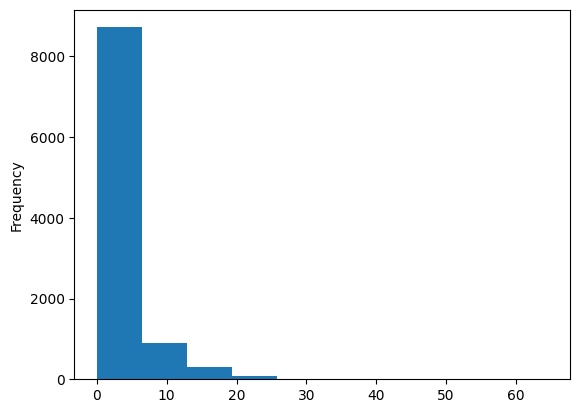

In [57]:
# I want to know how far did people travel in our data set?
# Let's see a histogram of those values

df['trip_distance'].plot.hist()